                                            Workshop 6: Annalaura Lerede, Valentina Giunchiglia and Dragos Gruia

# Introduction to Machine Learning

The aim of this workshop is to introduce you to the fundamental concepts of Machine Learning. Machine learning is a type of artificial intelligence . There are three common types of machine learning:

1. **Supervised Learning**: the model is trained on **labelled data**, which means that it learns from past data to make new predictions. For example, a model can be trained on a set of brain images of patients labelled as having Parkinson's or being healthy, from this data the model will learn how to predict the right clinical status of unseen images. Supervised learning can be further split into:
    - *Classification*: classification algorithms are used to predict a **categorical output label**, such as Alzheimer vs healthy, Malign vs Bening, Female vs Male.. Both binary and multi-label (more than two classes) classification can be computed. Commonly used supervised classification algorithms are: support vector machines, random forest, and logistic regression.
    - *Regression*: regression algorithms attempt to predict a **continous output variable**, such as age, test scores, years of survival... Commonly used regression algorithms are lasso regression, decision trees, multivariate and simple linear regression.
2. **Unsupervised Learning**: the model is trained on **unlabelled data** and attempts to find hidden patterns in the unstructured data. Unsupervised learning is commonly used for clustering and dimensionsionality reduction. Clustering consists 
3. **Reinforcement Learning**: 


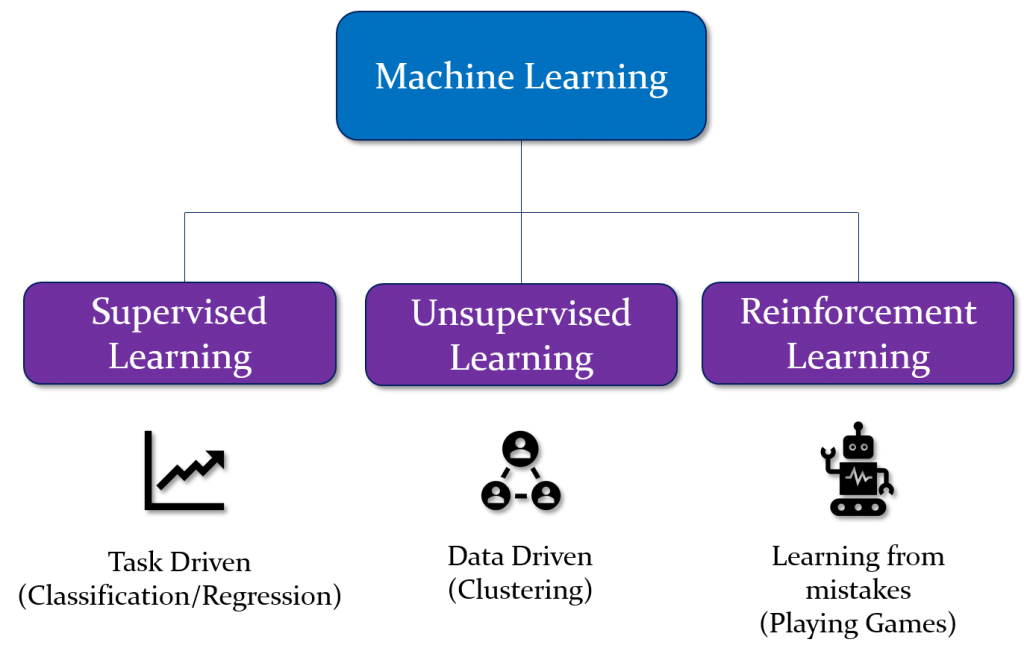

most common In the workshop, we will go through an example of supervised and unsupervised algorithm, and we will implement both a regression and classification model. The aim of the workshop is to use machine learning to predict whether patients have Alzheimer's or are cognitive healthy based on cognitive and imaging measures, and to predict their age using the same features. 

Throughout the workshop, we will use a new module called `sklearn`. `sklearn` is a machine learning library that has multiple functions for the processing of the data, the implementation and training of the machine learning models, and the evaluation of their performance. Let's start by downloading the module and importing it in the notebook, together with other modules we might need.

In [ ]:
!pip install sklearn

In [675]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [676]:
# pre-processing imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# models imports
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# metrics imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Great! Let's import the data in a dataframe and check them out.

In [697]:
data = pd.read_csv("Data/dementia_dataset.csv")
data = data.dropna().reset_index()
#data = data[data.Visit == 1].reset_index()
data.Group[data.Group == "Converted"] = "Nondemented"
data.head()

<ipython-input-697-a0ba10a2f94e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Group[data.Group == "Converted"] = "Nondemented"


index Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  \
0      0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   
1      1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   
2      5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   
3      6  OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   
4      7  OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   

   Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0   87    14  2.0  27.0  0.0  1987  0.696  0.883  
1   88    14  2.0  30.0  0.0  2004  0.681  0.876  
2   88    18  3.0  28.0  0.0  1215  0.710  1.444  
3   90    18  3.0  27.0  0.0  1200  0.718  1.462  
4   80    12  4.0  28.0  0.0  1689  0.712  1.039

In [698]:
# visualise data

data.head().T

0              1              2              3  \
index                   0              1              5              6   
Subject ID      OAS2_0001      OAS2_0001      OAS2_0004      OAS2_0004   
MRI ID      OAS2_0001_MR1  OAS2_0001_MR2  OAS2_0004_MR1  OAS2_0004_MR2   
Group         Nondemented    Nondemented    Nondemented    Nondemented   
Visit                   1              2              1              2   
MR Delay                0            457              0            538   
M/F                     M              M              F              F   
Hand                    R              R              R              R   
Age                    87             88             88             90   
EDUC                   14             14             18             18   
SES                     2              2              3              3   
MMSE                   27             30             28             27   
CDR                     0              0              0              0   
eTIV                 1987           2004           1215           1200   
nWBV                0.696          0.681           0.71          0.718   
ASF                 0.883          0.876          1.444          1.462   

                        4  
index                   7  
Subject ID      OAS2_0005  
MRI ID      OAS2_0005_MR1  
Group         Nondemented  
Visit                   1  
MR Delay                0  
M/F                     M  
Hand                    R  
Age                    80  
EDUC                   12  
SES                     4  
MMSE                   28  
CDR                     0  
eTIV                 1689  
nWBV                0.712  
ASF                 1.039

In [699]:
data.columns

Index(['index', 'Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F',
       'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [700]:
data.shape

(354, 16)

In [701]:
# create lists of features

cognitive_features = ['CDRSB','ADAS11','ADAS13','ADASQ4','MMSE','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting', 
                  'LDELTOTAL', 'DIGITSCOR','TRABSCOR', 'FAQ','mPACCdigit', 'mPACCtrailsB']
imaging_features = ['ICV','Fusiform','Hippocampus','MidTemp','Ventricles']

In [722]:
cognitive_features = ['MMSE','CDR', "EDUC", "SES"]
imaging_features = ['eTIV','nWBV']

In [723]:
cognitive_features = cognitive_features + imaging_features

In [724]:
print(len(cognitive_features))
print(len(imaging_features))

6
2


In [759]:
# look at min, mean and max of each cognitive feature
for col in cognitive_features:
    print(col, data[col].min(), data[col].mean(), data[col].max())


MMSE 4.0 27.40960451977401 30.0
CDR 0.0 0.2711864406779661 2.0
EDUC 6 14.703389830508474 23
SES 1.0 2.4604519774011298 5.0
eTIV 1106 1489.9915254237287 2004
nWBV 0.644 0.7298785310734474 0.8370000000000001


The cognitive features have a different range of variation: we need to standardise them to 0 mean and unit variance.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

## Classification: Alzheimer's or cognitively healthy?

The aim is to be able to predict whether classify COGNITIVE NORMAL people from people with DEMENTIA or MILD COGNITIVE IMPAIRMENT using their results on the cognitive tests. The 

In [726]:
# look at class prevalence in the data

data['Group'].value_counts()

Nondemented    227
Demented       127
Name: Group, dtype: int64

In [727]:
(data['Group']!='Nondemented').value_counts()/data.shape[0]

False    0.641243
True     0.358757
Name: Group, dtype: float64

We have a class imbalance: only 38% of the people are cognitive normal.

In [728]:
# get predictors and labels

X = data[cognitive_features]
y = (data['Group']!='Nondemented')

In [729]:
print(X.shape)
print(y.shape)

(354, 6)
(354,)


When dividing in train and test sets, we want to make sure to have the same proportion of classes in each set. To do that, we set the "stratify" paramenter equal to the class labels. Why is this important? Let's imagine the extreme case when the have a minority class that is really small, e.g. 5% of the total data. If we don't stratify the sets, we might end up with the whole minority class being in the training set or in the testing set.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [742]:
# split the data in training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12, shuffle=True, stratify=y)

In [743]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(265, 6)
(265,)
(89, 6)
(89,)


In [744]:
# check that classes proportion is the same in training and testing sets

print(y_train.value_counts()/y_train.shape[0])
print('\n')
print(y_test.value_counts()/y_test.shape[0])

False    0.641509
True     0.358491
Name: Group, dtype: float64


False    0.640449
True     0.359551
Name: Group, dtype: float64


In [745]:
# standardise the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [746]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)


Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [747]:
# train a Support Vector Machines classifier

classifier = SVC(class_weight=None, random_state=10)
classifier.fit(X_train, y_train)

# get predictions for the training and testing sets

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

# get accuracy for the training and testing sets

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [748]:
print("Training set accuracy: ", accuracy_train)
print("Testing set accuracy: ", accuracy_test)

Training set accuracy:  0.9547169811320755
Testing set accuracy:  0.9213483146067416


Accuracy on the training set is higher than on the testing set cause of overfitting.

In [749]:
# print the confusion matrix

In [750]:
confusion_matrix(y_test, y_pred_test)

array([[51,  6],
       [ 1, 31]])

Documentation on metrics: https://scikit-learn.org/stable/modules/model_evaluation.html

Looking at the confusion matrix we can see how the classifier tends to classify everything as the majority class and it is not really learning. To avoid this behaviour, when we have class imbalance we set the paramented "class_weight" in the classifier instantiation to "balanced". This tells the classifier to give more importance (in proportion) to errors made for samples of the minority class.

In [751]:
classifier = SVC(class_weight='balanced', random_state=10)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [752]:
print("Training set accuracy: ", accuracy_train)
print("Testing set accuracy: ", accuracy_test)

Training set accuracy:  0.9471698113207547
Testing set accuracy:  0.9213483146067416


In [753]:
confusion_matrix(y_test, y_pred_test)

array([[50,  7],
       [ 0, 32]])

This improves the accuracy and we can see a more distributed pattern in the erros.

K-fold validation is a way to exploit the whole data when not having a big dataset.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [754]:
# instantiate k-fold splits

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
accuracies = []

# loop through the folds

for train_index, test_index in kfolds.split(X, y):
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    
    scaler = StandardScaler()
    X_test = scaler.fit_transform(X_test)
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    print(y_train.value_counts()/y_train.shape[0])
    print(y_test.value_counts()/y_test.shape[0])
    print("\n")
    
    classifier = SVC(class_weight='balanced', random_state=12)
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    
    # get accurancy on current test fold
    accuracies.append(accuracy_score(y_test, y_pred_test))

TRAIN: (283,) TEST: (71,)
False    0.639576
True     0.360424
Name: Group, dtype: float64
False    0.647887
True     0.352113
Name: Group, dtype: float64


TRAIN: (283,) TEST: (71,)
False    0.639576
True     0.360424
Name: Group, dtype: float64
False    0.647887
True     0.352113
Name: Group, dtype: float64


TRAIN: (283,) TEST: (71,)
False    0.64311
True     0.35689
Name: Group, dtype: float64
False    0.633803
True     0.366197
Name: Group, dtype: float64


TRAIN: (283,) TEST: (71,)
False    0.64311
True     0.35689
Name: Group, dtype: float64
False    0.633803
True     0.366197
Name: Group, dtype: float64


TRAIN: (284,) TEST: (70,)
False    0.640845
True     0.359155
Name: Group, dtype: float64
False    0.642857
True     0.357143
Name: Group, dtype: float64




In [755]:
# get final accuracy taking the mean of the accuracies on each fold

np.mean(accuracies)

0.9350905432595573

In [756]:
# now try using a different number of folds and a different classifier

kfolds = # ADD CODE HERE
accuracies = []

# loop through the folds

for train_index, test_index in kfolds.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    classifier = # ADD CODE HERE
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred_test))

np.mean(accuracies)

SyntaxError: invalid syntax (<ipython-input-756-443b3797b5e6>, line 3)

Hint --> documentation: https://scikit-learn.org/stable/supervised_learning.html

Regression task: use the cognitive features to predict the age of the people

In [661]:
X = data[cognitive_features] # predictors/features
y = (data['Age']) # variable to predict

In [662]:
print(data.Age.min())
print(data.Age.max())
print(data.Age.mean())
print(data.Age.isnull().sum())

60
98
77.03389830508475
0


Text(0, 0.5, 'Count')

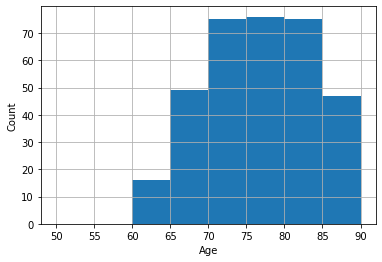

In [663]:
# look at the distribution of age across participants

data['Age'].hist(bins=np.arange(50,95,5))
plt.xlabel("Age")
plt.ylabel("Count")

In [664]:
# split the data in training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12, shuffle=True)

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [665]:
# perform linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

In [666]:
# print regression coefficients
print("Coefficients: \n", lin_reg.coef_)

# print mean square error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# print coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 4.53212197e-01 -1.34060621e+00  2.12067021e-02 -1.27080888e+02
  3.42796534e+01]
Mean squared error: 39.35
Coefficient of determination: 0.37


Text(0, 0.5, 'Age pred')

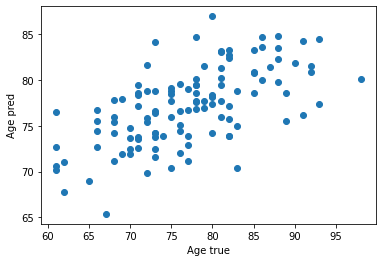

In [667]:
plt.scatter(y_test, y_pred)
plt.xlabel("Age true")
plt.ylabel("Age pred")

In [668]:
# now try to use RIDGE regression

ridge_reg = # ADD CODE HERE
ridge_reg.fit(X_train,y_train)
y_pred = ridge_reg.predict(X_test)

print("Coefficients: \n", ridge_reg.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

SyntaxError: invalid syntax (<ipython-input-668-20934de2c5b2>, line 3)

Hint --> documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

PCA for dimensionality reduction and data visualisation

Each ognitive test often involves more than one cognitive domain. That is why scores on different tests are often correlated. 

In [669]:
# get only the cognitive features

X = data[cognitive_features]

<AxesSubplot:>

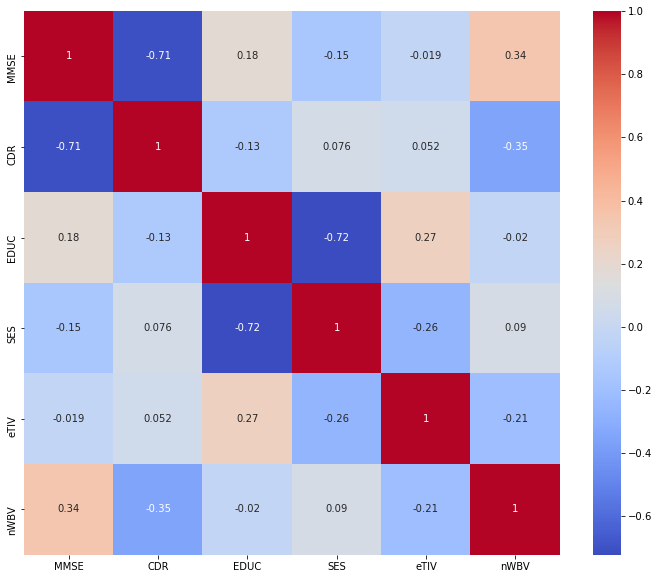

In [760]:
# look at correlations between cognitive features

plt.figure(figsize=(12,10))
sns.heatmap(data[cognitive_features].corr(), annot=True, cmap="coolwarm")

One way to obtain the latent cognitive domains from the scores on the tests is to use PCA. This also allows to visualise cognition in two dimensions.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

The first time we perform pca we don't set the number of components because we want to find out the optimal number of components using the Kaisen criterion, i.e. we take all the components with eigenvalue >1

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [632]:
# before performing PCA you need to standardise the features. We have already done it above in this case.

# initialise pca
pca = PCA()
# fit pca
principalComponents = pca.fit_transform(X)
# get variance explained by each component
variance = pca.explained_variance_ratio_
# get eigenvalues
eigenvalues = pca.explained_variance_
# get cumulatice variance with increasing number of principal components used
cum_var = np.cumsum(variance)

In [633]:
print("Percent variance explained:",variance,"\n")
print("Eigenvalues:",eigenvalues,"\n")
print("Cumulative variance explained:",cum_var,"\n")

Percent variance explained: [9.99259406e-01 4.71980474e-04 2.48176524e-04 1.81832121e-05
 2.20326484e-06 3.76652746e-08 1.29840741e-08] 

Eigenvalues: [3.08952664e+04 1.45927698e+01 7.67316252e+00 5.62191537e-01
 6.81209040e-02 1.16454114e-03 4.01443734e-04] 

Cumulative variance explained: [0.99925941 0.99973139 0.99997956 0.99999775 0.99999995 0.99999999
 1.        ] 



ValueError: x and y must have same first dimension, but have shapes (14,) and (5,)

<Figure size 432x288 with 0 Axes>

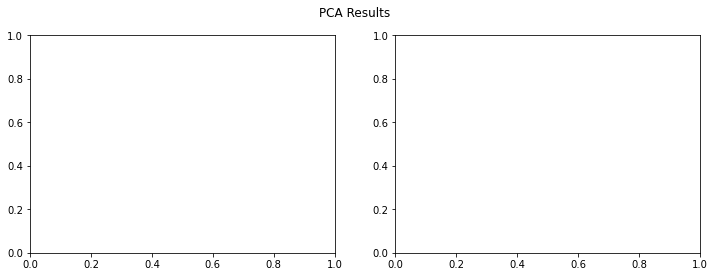

In [238]:
plt.figure()
f, ax = plt.subplots(1,2,figsize=(12,4))
f.suptitle('PCA Results')

# plot eigenvalues
ax[0].plot(np.arange(1,15), eigenvalues)
ax[0].scatter(np.arange(1,15), eigenvalues, c='r')
ax[0].axhline(y=1,c='r') # Kaiser criterion
ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Eigenvalues')
ax[0].grid(True)

# plot cumulative variance
ax[1].plot(np.arange(1,15), cum_var*100)
ax[1].scatter(np.arange(1,15), cum_var*100, c='r')
ax[1].set_xlabel('# of Principal Components')
ax[1].set_ylabel('Cumulative Variance Explained %')
ax[1].grid(True)

Following the Kaisen criterion we end up taking only 2 principal dimensions. We can use these to plot the data in two dimensions. Together they explain 63% of the variance in the data.

In [761]:
# perform pca with 2 components

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [762]:
principalComponents.shape

(354, 2)

Text(0, 0.5, '2nd PC')

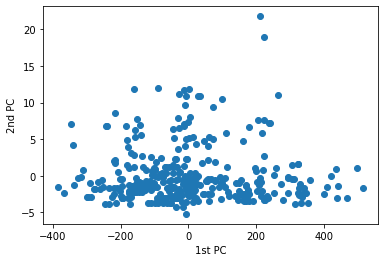

In [763]:
plt.scatter(principalComponents[:,0],principalComponents[:,1])
plt.xlabel("1st PC")
plt.ylabel("2nd PC")

Text(0.5, 1.0, 'PCA loadings')

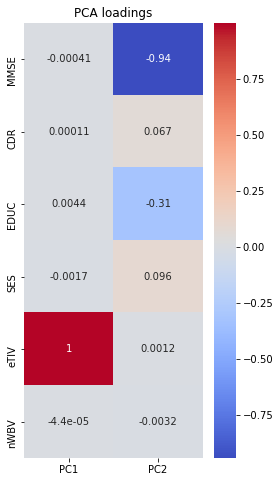

In [764]:
# plot loadings of the cognitive tests on the two principal components

plt.figure(figsize=(4,8))
loadings = (pca.components_.T)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm')
plt.title("PCA loadings")